# 🌐 Creative Visualizations with Real-World Data


Welcome to the **Creative Data Visualization Lab**!  
In this notebook, we explore **non-routine**, **creative**, and **visually powerful** plots using real-world datasets.

Instead of standard line/bar plots, we'll focus on:
- 🗺️ **Geographical Maps**
- 🧭 **Radar Charts**
- 🧬 **Violin/Strip/Density Plots**
- 🔄 **Treemaps and Sunbursts**
- 📦 **Hexbins and Joyplots (Ridge plots)**

---

## 🔧 Setup


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

plt.rcParams['figure.figsize'] = (14, 6)
sns.set(style="whitegrid")


## 🌍 Global CO2 Emissions (Geographical Bubble Map)

In [2]:
co2_url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
co2 = pd.read_csv(co2_url)
co2_latest = co2[co2['year'] == co2['year'].max()]
co2_latest = co2_latest[co2_latest['iso_code'].str.len() == 3]  # country codes only
co2_latest = co2_latest[['iso_code', 'country', 'year', 'co2', 'population']].dropna()
co2_latest.head()

,iso_code,country,year,co2,population
273,AFG,Afghanistan,2023,11.020,41454762.0
895,ALB,Albania,2023,5.144,2811660.0
1069,DZA,Algeria,2023,178.133,46164221.0
1343,AND,Andorra,2023,0.424,80868.0
1517,AGO,Angola,2023,20.781,36749907.0


In [3]:
fig = px.scatter_geo(co2_latest,
                     locations="iso_code",
                     color="co2",
                     size="co2",
                     hover_name="country",
                     projection="natural earth",
                     title="🌍 Global CO2 Emissions (Most Recent Year)",
                     color_continuous_scale="Reds")
fig.show()

## 🧭 Radar Chart (Iris Dataset Mean Features)

In [4]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
iris_df = iris.frame.copy()
iris_avg = iris_df.groupby('target').mean()
iris_avg.index = ['Setosa', 'Versicolor', 'Virginica']
iris_avg = iris_avg.reset_index()
iris_avg

,index,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,Setosa,5.006,3.428,1.462,0.246
1,Versicolor,5.936,2.770,4.260,1.326
2,Virginica,6.588,2.974,5.552,2.026


In [5]:
categories = iris_avg.columns[1:]
fig = go.Figure()
for i in range(iris_avg.shape[0]):
    fig.add_trace(go.Scatterpolar(
        r=iris_avg.loc[i, categories].values,
        theta=categories,
        fill='toself',
    ))
fig.update_layout(polar=dict(radialaxis=dict(visible=True)),
                  title="🧭 Radar Chart of Iris Species",
                  showlegend=True)
fig.show()

## 🧬 Violin Plot – GDP per Capita by Continent

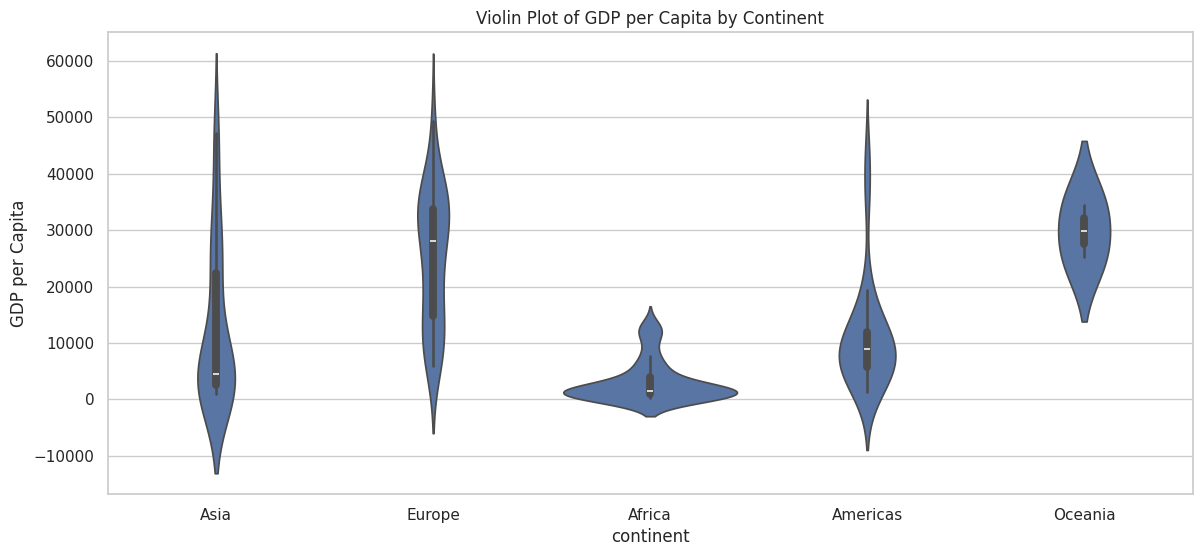

In [6]:
gap_url = 'https://raw.githubusercontent.com/plotly/datasets/master/gapminderDataFiveYear.csv'
gap = pd.read_csv(gap_url)
latest = gap[gap['year'] == gap['year'].max()]
sns.violinplot(data=latest, x='continent', y='gdpPercap')
plt.title("Violin Plot of GDP per Capita by Continent")
plt.ylabel("GDP per Capita")
plt.show()

## 🌲 Treemap – COVID-19 Total Cases by Continent & Country

In [7]:
covid_url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/owid-covid-latest.csv'
covid = pd.read_csv(covid_url)
covid = covid[covid['continent'].notna()]  # filter valid countries
covid['location'] = covid['location'].astype(str)
covid = covid[['continent', 'location', 'total_cases']].dropna()
covid = covid[covid['total_cases'] > 0]
fig = px.treemap(covid,
                 path=['continent', 'location'],
                 values='total_cases',
                 title='🌲 COVID-19 Total Cases by Continent & Country',
                 color='total_cases',
                 color_continuous_scale='RdBu')
fig.show()

## 🔳 Hexbin Plot – Simulated House Price vs Size

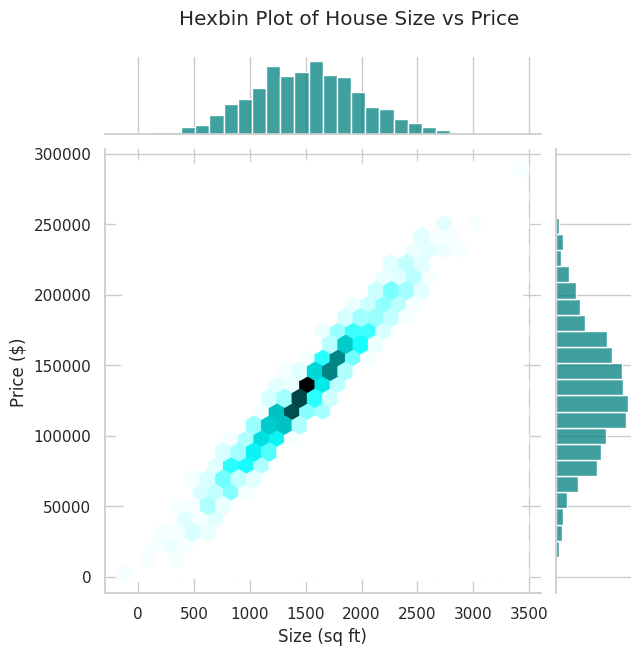

In [8]:
np.random.seed(42)
size = np.random.normal(loc=1500, scale=500, size=1000)
price = size * np.random.uniform(80, 120) + np.random.normal(0, 10000, size=1000)
sns.jointplot(x=size, y=price, kind='hex', color='teal')
plt.suptitle("Hexbin Plot of House Size vs Price", y=1.05)
plt.xlabel("Size (sq ft)")
plt.ylabel("Price ($)")
plt.show()

## ⚽ Football Player Stats (Radar & Creative Visuals)


Let’s explore the world of football (soccer) using stats on top players.

We’ll visualize individual and comparative player attributes using:
- 🧭 **Radar charts** (for skill breakdown)
- 🔵 **Bubble plots** (to compare multiple numeric features)
- 🔁 **Parallel coordinate plots** (to spot profiles or archetypes)


In [9]:
# Load sample football dataset
url = "https://raw.githubusercontent.com/4m4n5/fifa18-all-player-statistics/master/2019/data.csv"
df_fb = pd.read_csv(url)
df_fb = df_fb[['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Value', 'Wage',
               'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
               'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl']]
df_fb = df_fb.dropna().reset_index(drop=True)
df_fb.head()

,Name,Age,Nationality,Overall,Potential,Value,Wage,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl
0,L. Messi,31,Argentina,94,94,€110.5M,€565K,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0
1,Cristiano Ronaldo,33,Portugal,94,94,€77M,€405K,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0
2,Neymar Jr,26,Brazil,92,93,€118.5M,€290K,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0
3,De Gea,27,Spain,91,93,€72M,€260K,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0
4,K. De Bruyne,27,Belgium,91,92,€102M,€355K,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0


### 🧭 Radar Chart: Comparing Two Players

In [10]:
players = ['Cristiano Ronaldo', 'L. Messi']
features = ['Finishing', 'Dribbling', 'BallControl', 'ShortPassing', 'HeadingAccuracy']

subset = df_fb[df_fb['Name'].isin(players)][['Name'] + features].set_index('Name')
subset = subset.T

fig = go.Figure()
for player in subset.columns:
    fig.add_trace(go.Scatterpolar(
        r=subset[player],
        theta=subset.index,
        fill='toself',
        name=player
    ))
fig.update_layout(title="Radar Chart of Player Skills", polar=dict(radialaxis=dict(visible=True)))
fig.show()

### 🔵 Bubble Chart: Overall vs Potential vs Age

In [11]:
top_fb = df_fb[df_fb['Overall'] > 85]
fig = px.scatter(top_fb, x="Overall", y="Potential", color="Nationality", size="Age",
                 hover_name="Name", title="Top Players: Overall vs Potential vs Age")
fig.show()

### 🔁 Parallel Coordinates: Player Technical Profile

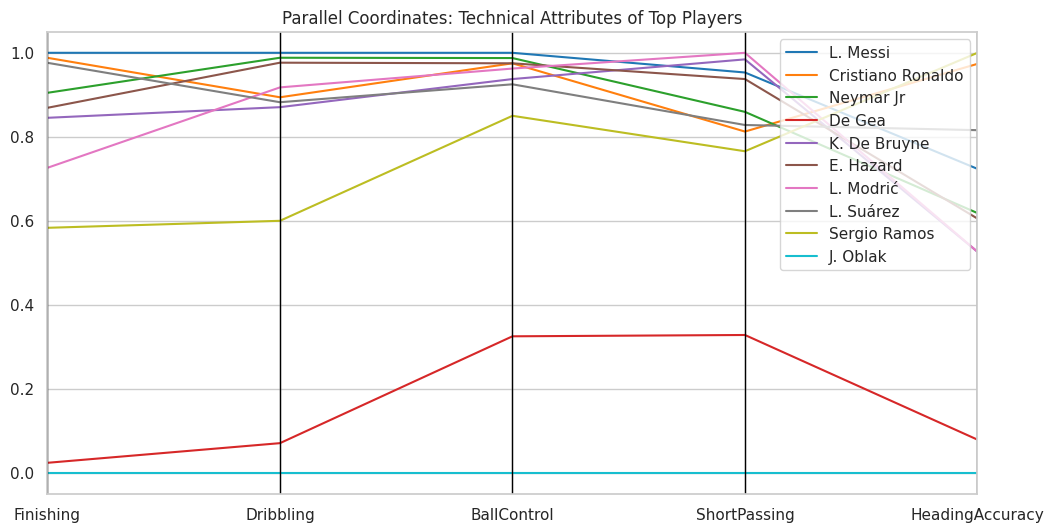

In [12]:
from pandas.plotting import parallel_coordinates

# Prepare and normalize
features = ['Finishing', 'Dribbling', 'BallControl', 'ShortPassing', 'HeadingAccuracy']
sample = df_fb[df_fb['Overall'] > 87].drop_duplicates(subset=['Name']).copy()
sample = sample[['Name'] + features].dropna().head(10)
sample[features] = sample[features].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

plt.figure(figsize=(12,6))
parallel_coordinates(sample, 'Name', colormap='tab10')
plt.title("Parallel Coordinates: Technical Attributes of Top Players")
plt.grid(True)
plt.show()